# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
print("Hello world")
print(mouse_metadata)
print(study_results)


Mouse_df = pd.merge(mouse_metadata,study_results,on ="Mouse ID")
Mouse_df
# Display the data table for preview


Hello world
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0       k403     Ramicane    Male          21          16
1       s185    Capomulin  Female           3          17
2       x401    Capomulin  Female          16          15
3       m601    Capomulin    Male          22          17
4       g791     Ramicane    Male          11          16
..       ...          ...     ...         ...         ...
244     z314     Stelasyn  Female          21          28
245     z435     Propriva  Female          12          26
246     z581    Infubinol  Female          24          25
247     z795     Naftisol  Female          13          29
248     z969     Naftisol    Male           9          30

[249 rows x 5 columns]
     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0        b128          0           45.000000                 0
1        f932          0           45.000000                 0
2        g107          0           45.000000                 0
3        a457   

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
Mouse_count = len(pd.unique(Mouse_df['Mouse ID']))
print(Mouse_count)

249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint

unique_values_set_df = Mouse_df.drop_duplicates( 
  subset = ['Mouse ID', 'Timepoint'], 
  keep = 'last').reset_index(drop = True) 


# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


duplicate_values_df = Mouse_df[Mouse_df[['Mouse ID','Timepoint']].duplicated() == True]

duplicate_values_Mouse_list = duplicate_values_df["Mouse ID"].tolist()

print(duplicate_values_Mouse_list)


['g989', 'g989', 'g989', 'g989', 'g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

All_Dup_Mouse = Mouse_df[Mouse_df['Mouse ID'].isin(duplicate_values_Mouse_list)]

All_Dup_Mouse


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#Mouse_unq_df = Mouse_df.drop_duplicates(subset=['Mouse ID'], keep=False)


Mouse_unq_df = Mouse_df.drop(Mouse_df[Mouse_df["Mouse ID"] == "g989"].index)

print(Mouse_unq_df)

     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [6]:
# Checking the number of mice in the clean DataFrame.
Mouse_count_unique = len(pd.unique(Mouse_unq_df['Mouse ID']))
Mouse_count_unique

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

from functools import reduce


drug_regimen = Mouse_df.groupby("Drug Regimen")


#print(drug_regimen)
#Tumor = drug_regimen.get_group("Sex")
#print(Tumor)

drug_regimen_df_mean   = pd.DataFrame(drug_regimen["Tumor Volume (mm3)"].mean().to_frame('Mean Tumor Value'))
drug_regimen_df_median = pd.DataFrame(Mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median().to_frame('Median Tumor Value'))
drug_regimen_df_var    = pd.DataFrame(Mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var().to_frame('Tumor Volume Variance'))
drug_regimen_df_std    = pd.DataFrame(Mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std().to_frame('Tumor Volume Std.Dev.'))
drug_regimen_df_sem    = pd.DataFrame(Mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem().to_frame('Tumor Volume Std.Err.'))


dfs= [drug_regimen_df_mean,drug_regimen_df_median,drug_regimen_df_var,drug_regimen_df_std,drug_regimen_df_sem]

drug_regimen_summary = pd.DataFrame(reduce(lambda  left,right: pd.merge(left,right,on=['Drug Regimen'],
                                            how='outer'), dfs))

print(drug_regimen_summary)


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


              Mean Tumor Value  Median Tumor Value  Tumor Volume Variance  \
Drug Regimen                                                                
Capomulin            40.675741           41.557809              24.947764   
Ceftamin             52.591172           51.776157              39.290177   
Infubinol            52.884795           51.820584              43.128684   
Ketapril             55.235638           53.698743              68.553577   
Naftisol             54.331565           52.509285              66.173479   
Placebo              54.033581           52.288934              61.168083   
Propriva             52.322552           50.854632              42.351070   
Ramicane             40.216745           40.673236              23.486704   
Stelasyn             54.233149           52.431737              59.450562   
Zoniferol            53.236507           51.818479              48.533355   

              Tumor Volume Std.Dev.  Tumor Volume Std.Err.  
Drug Regimen  

In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


print(Mouse_df.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)':['mean', 'median','var','std','sem']}).reset_index())




  Drug Regimen Tumor Volume (mm3)                                          
                             mean     median        var       std       sem
0    Capomulin          40.675741  41.557809  24.947764  4.994774  0.329346
1     Ceftamin          52.591172  51.776157  39.290177  6.268188  0.469821
2    Infubinol          52.884795  51.820584  43.128684  6.567243  0.492236
3     Ketapril          55.235638  53.698743  68.553577  8.279709  0.603860
4     Naftisol          54.331565  52.509285  66.173479  8.134708  0.596466
5      Placebo          54.033581  52.288934  61.168083  7.821003  0.581331
6     Propriva          52.322552  50.854632  42.351070  6.507770  0.512884
7     Ramicane          40.216745  40.673236  23.486704  4.846308  0.320955
8     Stelasyn          54.233149  52.431737  59.450562  7.710419  0.573111
9    Zoniferol          53.236507  51.818479  48.533355  6.966589  0.516398


## Bar and Pie Charts

[230 178 178 188 186 181 161 228 181 182]
['Ramicane' 'Capomulin' 'Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn'
 'Zoniferol' 'Ketapril' 'Propriva' 'Naftisol']


<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

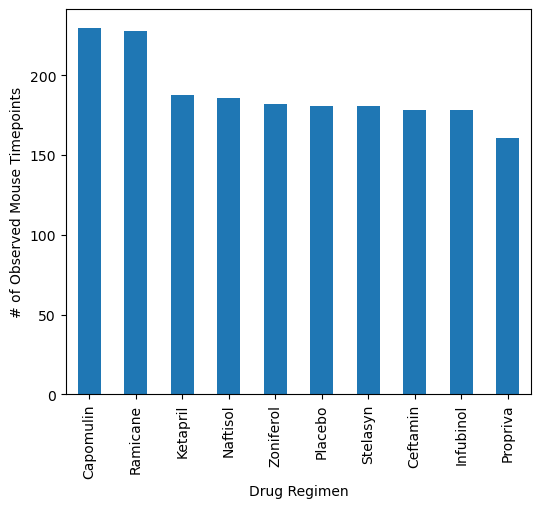

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

Total = Mouse_df.groupby("Drug Regimen")["Timepoint"].count().values

Regimens = Mouse_df["Drug Regimen"].unique()

print(Total)
print(Regimens)


drug_regimen_bar = Mouse_df.groupby("Drug Regimen")["Timepoint"].count().sort_values(ascending=False)

drug_regimen_bar.plot(kind='bar', ylabel='# of Observed Mouse Timepoints',
         xlabel='Drug Regimen', figsize=(6, 5))



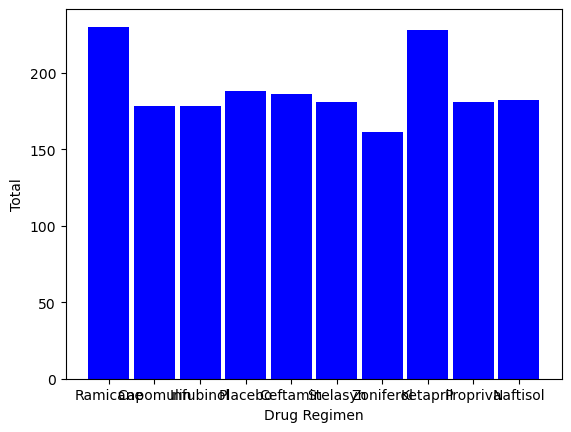

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

import matplotlib.pyplot as plt

Total = Mouse_df.groupby("Drug Regimen")["Timepoint"].count().values

Regimens = Mouse_df["Drug Regimen"].unique()



plt.bar(Regimens,Total, color ='blue', width = 0.9)
 
plt.xlabel("Drug Regimen")
plt.ylabel("Total")
plt.show()





<Axes: ylabel='# of Mouse'>

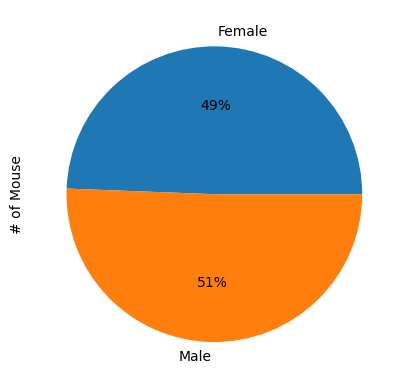

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas



Mouse_sex_df = Mouse_df.groupby("Sex")["Timepoint"].count()


Mouse_sex_df.plot(kind='pie', ylabel='# of Mouse',autopct='%1.0f%%')

([<matplotlib.patches.Wedge at 0x151bd9790>,
 [Text(0.020992503472585564, 1.0997996703027118, 'Female'),
  Text(-0.020992503472586185, -1.0997996703027118, 'Male')],
 [Text(0.011450456439592124, 0.5998907292560246, '49.4%'),
  Text(-0.011450456439592464, -0.5998907292560246, '50.6%')])

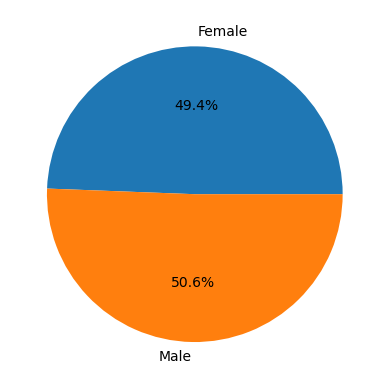

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = 'Female', 'Male'
distribution = Mouse_df.groupby("Sex")["Timepoint"].count().values

fig, ax = plt.subplots()
ax.pie(distribution, labels=labels,autopct='%1.1f%%')


## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  


Mouse_timepoint = Mouse_df.groupby("Mouse ID","Drug Regimen")["Timepoint"]





# Capomulin, Ramicane, Infubinol, and Ceftamin





# Start by getting the last (greatest) timepoint for each mouse






# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint








ValueError: No axis named Drug Regimen for object type DataFrame

In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


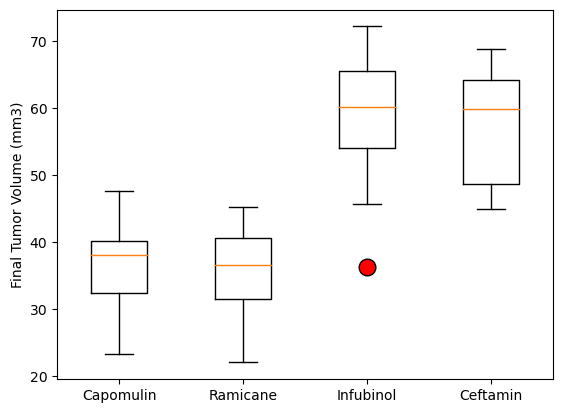

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

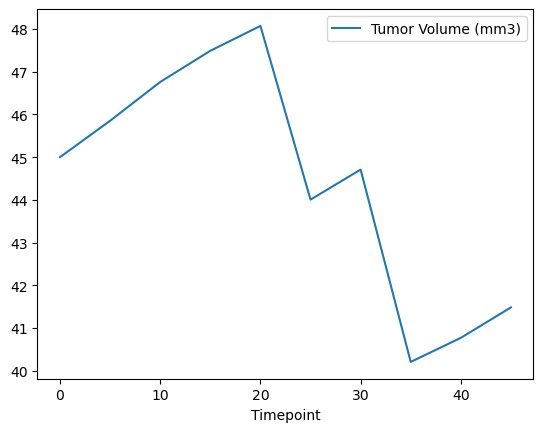

In [47]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin



Single_mouse =Mouse_df.loc[Mouse_df['Mouse ID'] == 'l509']

Single_mouse_plt = Single_mouse[["Timepoint","Tumor Volume (mm3)"]]

Single_mouse_plt.index = Single_mouse_plt['Timepoint']


Single_mouse_plt.plot(x="Timepoint", y="Tumor Volume (mm3)")
plt.show()



   Weight (g)  Tumor Volume (mm3)
0          15           36.182040
1          17           37.214133
2          19           41.182391
3          20           39.141053
4          21           42.088700
5          22           43.288490
6          23           43.341051
7          24           44.805810
8          25           44.062109


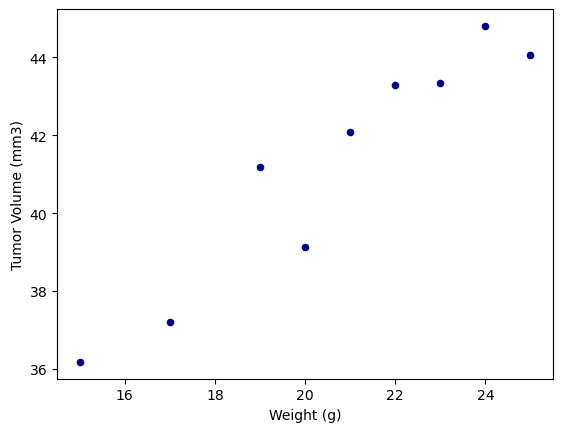

In [54]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

Capomulin_mose_df = Mouse_df.loc[Mouse_df['Drug Regimen'] == 'Capomulin']


Capomulin_avg = Capomulin_mose_df.groupby("Weight (g)")["Tumor Volume (mm3)"].mean().reset_index()
print(Capomulin_avg)

ax1 = Capomulin_avg.plot.scatter(x="Weight (g)",y="Tumor Volume (mm3)",c='DarkBlue')
                       
                       


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


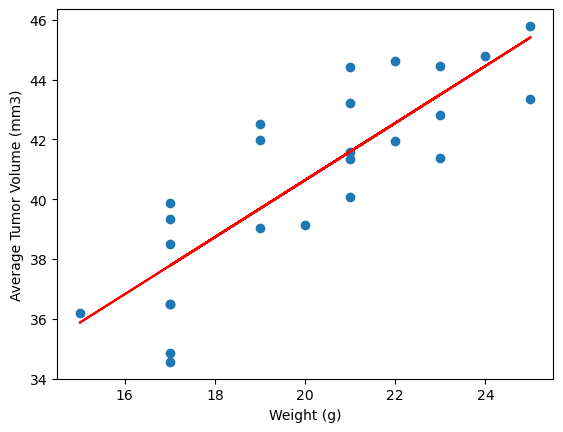

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
